In [1]:
import pandas as pd
import geopandas as gpd
import mapclassify
import pysal
import matplotlib.pyplot as plt
from geosnap import DataStore
from geosnap.io import get_lodes

/opt/tljh/user/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/tljh/user/lib/python3.10/site-packages/quantecon/lss.py:20: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def simulate_linear_model(A, x0, v, ts_length):


In [2]:
datasets = DataStore("/srv/data/geosnap")

In [3]:
lodes = get_lodes(datasets, county_fips='06073', years=[2021, 2016, 2011, 2006])

In [4]:
lodes.columns

Index(['geoid', 'year', 'CFA01', 'CFA02', 'CFA03', 'CFA04', 'CFA05', 'CFS01',
       'CFS02', 'CFS03', 'CFS04', 'CFS05', 'aland20', 'awater20',
       'create_date', 'earnings_1251_3333', 'earnings_over_3333',
       'earnings_under_1250', 'education_bachelors', 'education_hs',
       'education_lths', 'education_some_college', 'employees_30_54',
       'employees_55plus', 'employees_asian', 'employees_black',
       'employees_female', 'employees_hawaiian_pi', 'employees_hispanic',
       'employees_male', 'employees_native_american', 'employees_not_hispanic',
       'employees_twoplus_races', 'employees_under_30', 'employees_white',
       'geometry', 'housing_units', 'naics_11', 'naics_21', 'naics_22',
       'naics_23', 'naics_31_33', 'naics_42', 'naics_44_45', 'naics_48_49',
       'naics_51', 'naics_52', 'naics_53', 'naics_54', 'naics_55', 'naics_56',
       'naics_61', 'naics_62', 'naics_71', 'naics_72', 'naics_81', 'naics_92',
       'population', 'total_employees'],
      dtyp

<Axes: >

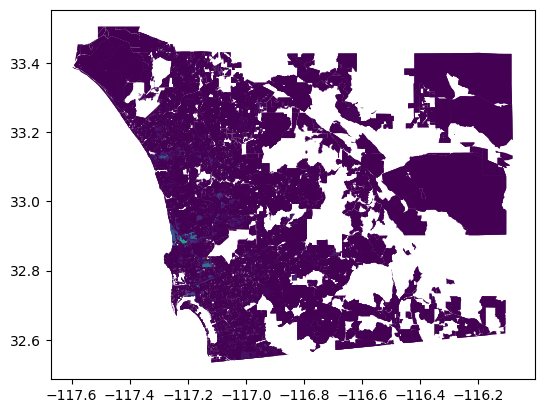

In [5]:
lodes.plot(column='total_employees')

In [6]:
lodes.head()


,geoid,year,CFA01,CFA02,CFA03,CFA04,CFA05,CFS01,CFS02,CFS03,...,naics_55,naics_56,naics_61,naics_62,naics_71,naics_72,naics_81,naics_92,population,total_employees
0,060730001001000,2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,1.0,0.0,3.0,3.0,0.0,293,14.0
1,060730001001000,2011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,1.0,0.0,2.0,1.0,0.0,293,10.0
2,060730001001000,2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,293,16.0
3,060730001001000,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,293,18.0
4,060730001001001,2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,NaN


<Axes: >

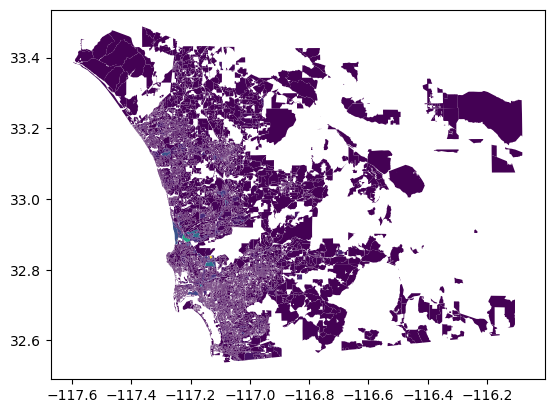

In [8]:
lodes[lodes['year']==2021].plot(column='total_employees')

<Axes: >

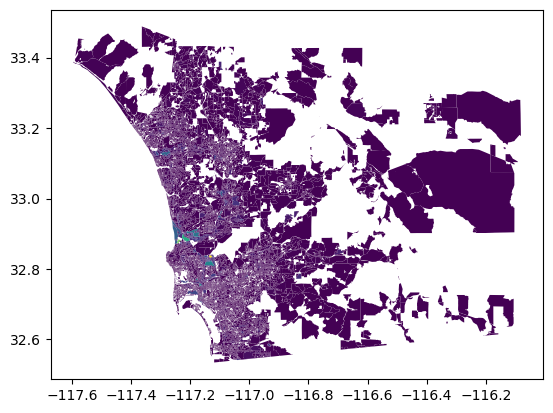

In [9]:
lodes[lodes['year']==2016].plot(column='total_employees')

<Axes: >

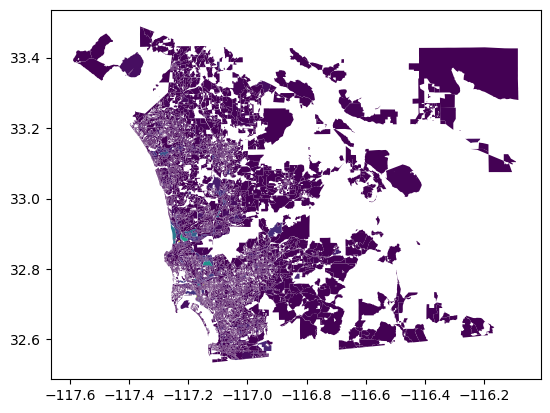

In [10]:
lodes[lodes['year']==2011].plot(column='total_employees')

In [11]:
years = [2021, 2016, 2011, 2006]

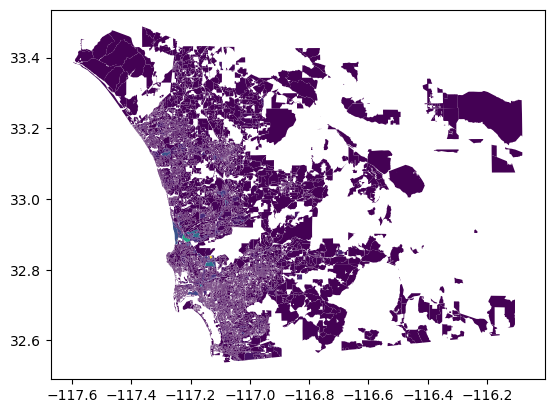

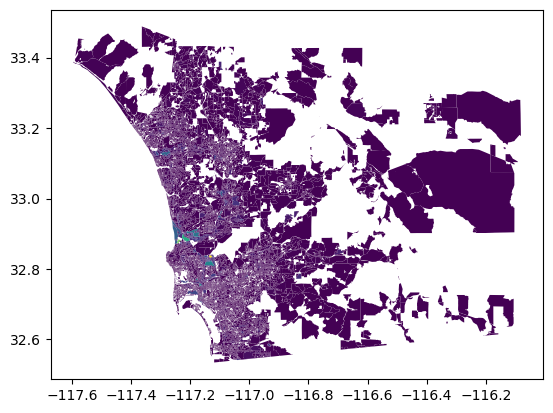

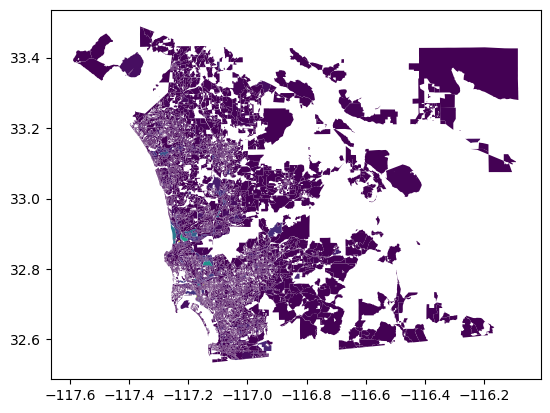

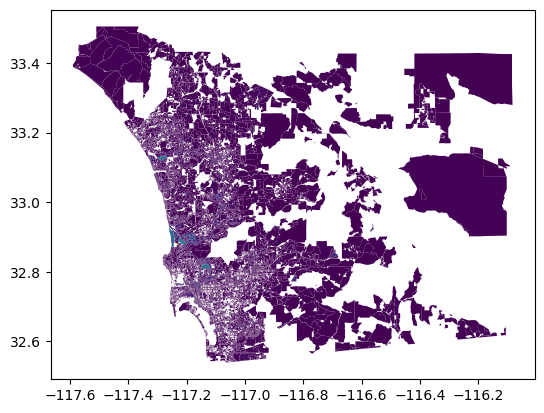

In [12]:
for i in years:
    lodes[lodes['year']==i].plot(column='total_employees')

IndexError: index 2021 is out of bounds for axis 0 with size 4

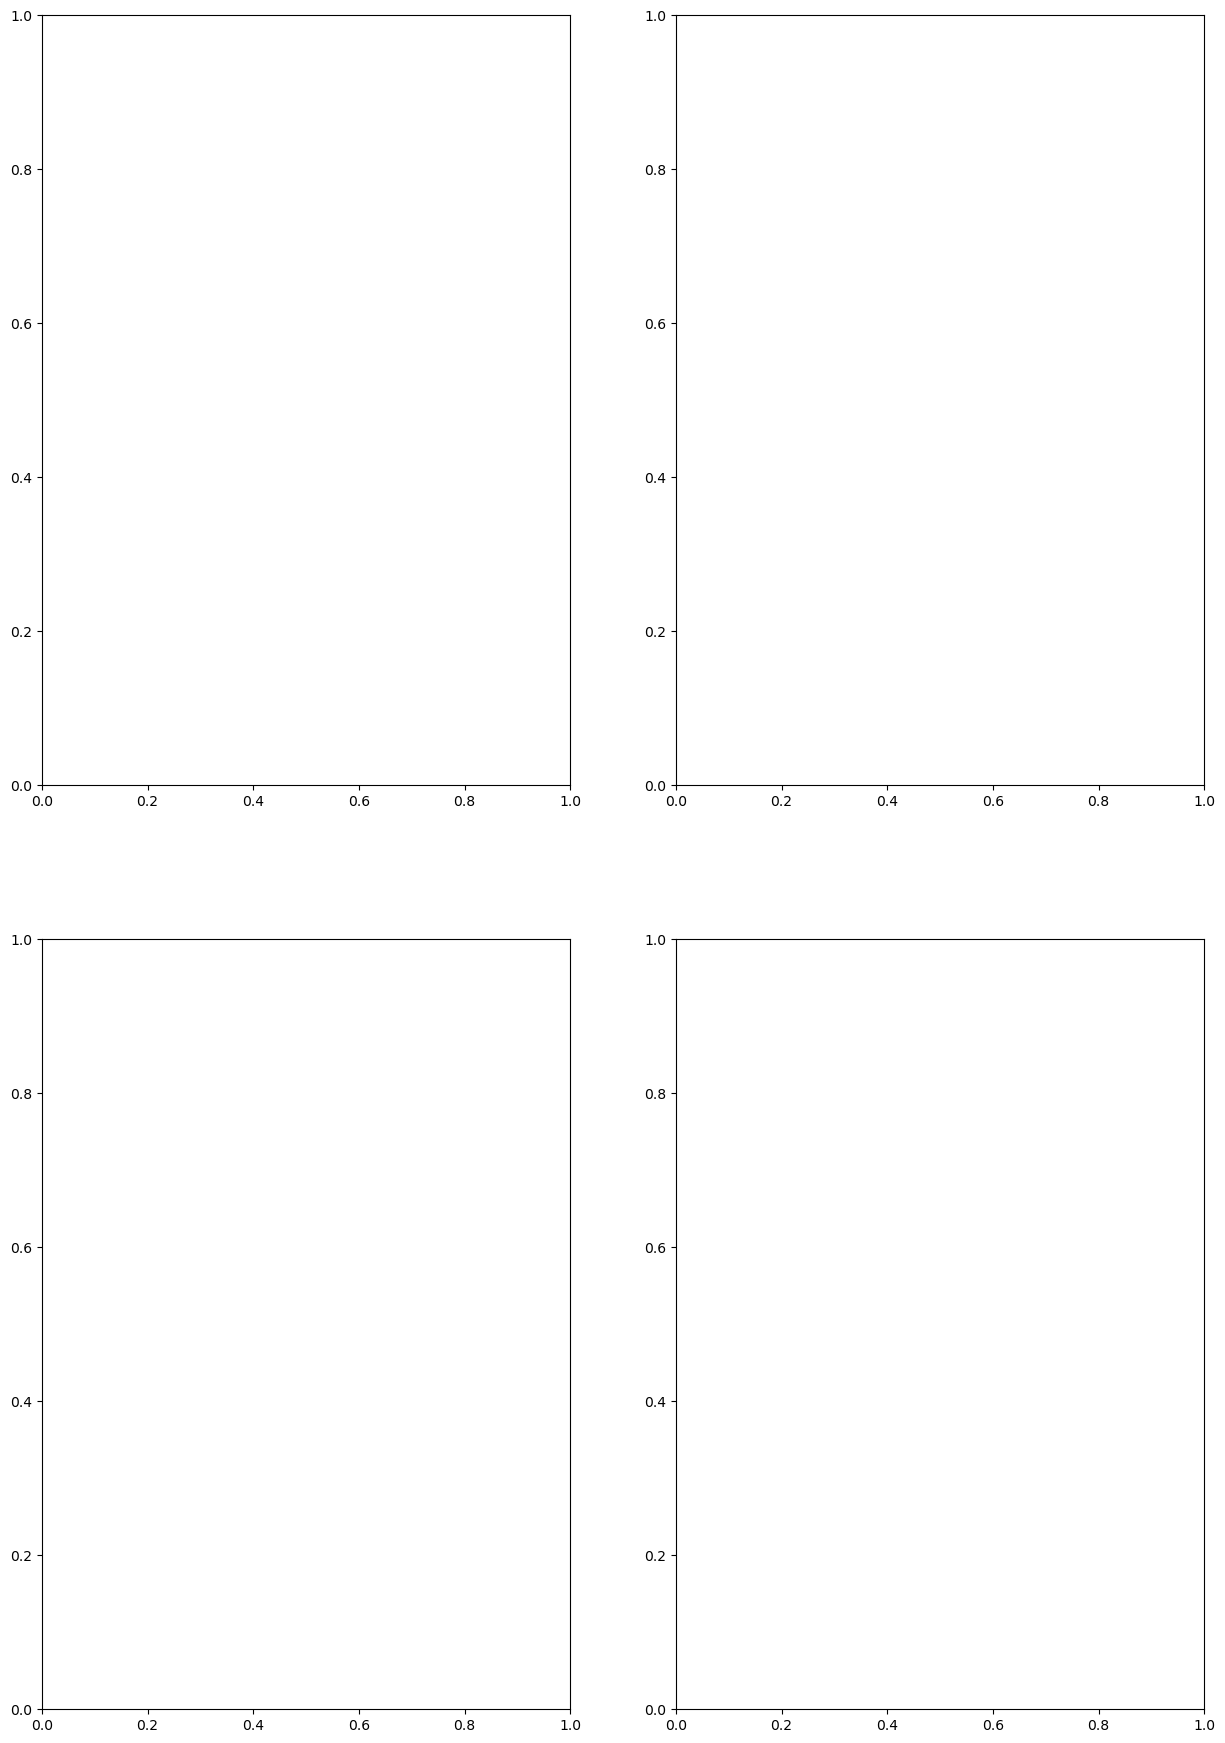

In [13]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 22))

axs=axs.flatten()


for i in years:
    ax = axs[i]
    lodes[lodes['year']==i].plot(column='total_employees', ax=ax, scheme='Quantiles', k=5, 
                                 legend=True, legend_kwds={'bbox_to_anchor': (1.7, 0.7), "fmt": "{:.2f}"})
    ax.set_title(col)
